In [4]:
import pandas as pd
home_data=pd.read_csv('kaggle_ml_course_home_data_train.csv')

In [5]:
home_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = round(home_data["LotArea"].mean())  # Don't write home_data["LotArea"].mean().round() because round is a built in top level function 
print(avg_lot_size)
# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 2022 - int(home_data["YearBuilt"].max())
print(newest_home_age)

10517
12


### Think About Your Data
The newest house in your data isn't that new. A few potential explanations for this:

They haven't built new houses where this data was collected.
The data was collected a long time ago. Houses built after the data publication wouldn't show up.

In [12]:
#In my opinion, the data was collected a long time ago. Here are my reasons for that:

Avg_price_by_year_month = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.mean().round())
Cnt_price_by_year_month = pd.DataFrame(home_data.groupby(["YrSold","MoSold"]).SalePrice.count().round())

price_table = Avg_price_by_year_month.merge(Cnt_price_by_year_month,on = ["YrSold","MoSold"])
price_table = price_table.rename(index = str, columns = {"SalePrice_x": "Avg_SalePrice", "SalePrice_y": "SaleCount" })
print(price_table)

               Avg_SalePrice  SaleCount
YrSold MoSold                          
2006   1            201090.0         10
       2            194322.0          9
       3            184982.0         25
       4            174313.0         27
       5            158928.0         38
       6            172283.0         48
       7            183211.0         67
       8            196240.0         23
       9            223769.0         15
       10           172357.0         24
       11           213285.0         16
       12           185545.0         12
2007   1            183235.0         13
       2            176302.0          8
       3            176568.0         23
       4            170773.0         23
       5            169874.0         43
       6            179726.0         59
       7            195397.0         51
       8            183941.0         40
       9            195534.0         11
       10           215429.0         16
       11           197709.0         24


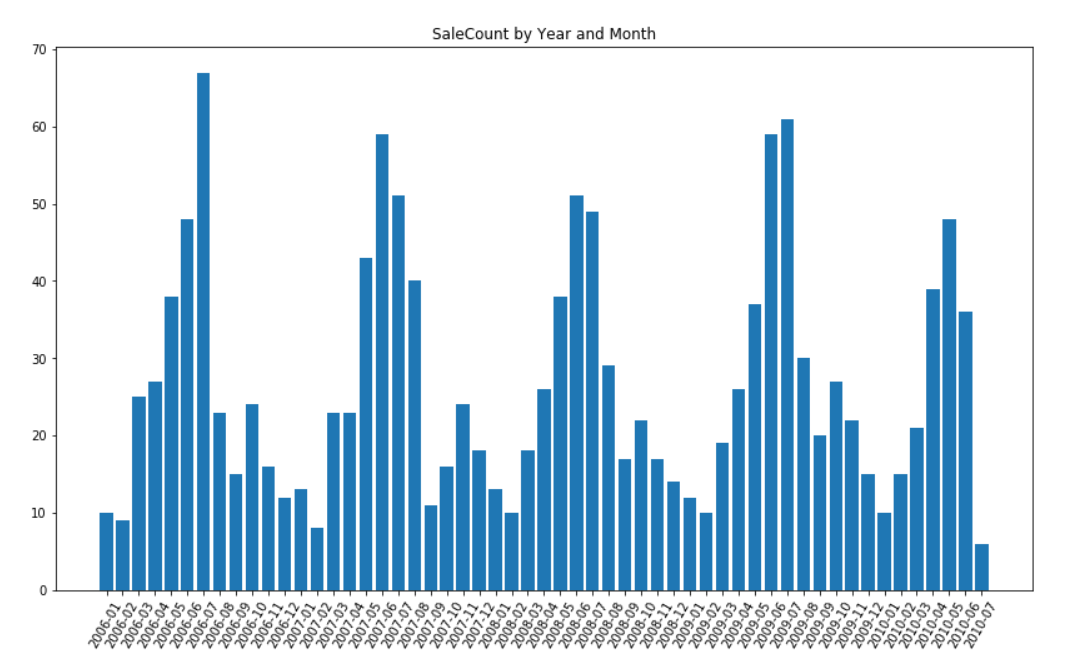

The above graph shows we have a repeated pattern in our data, but if we look at the last data point, 2010-07, we have a small number against number of sales in the same month in other years. The following picture shows this fact better:

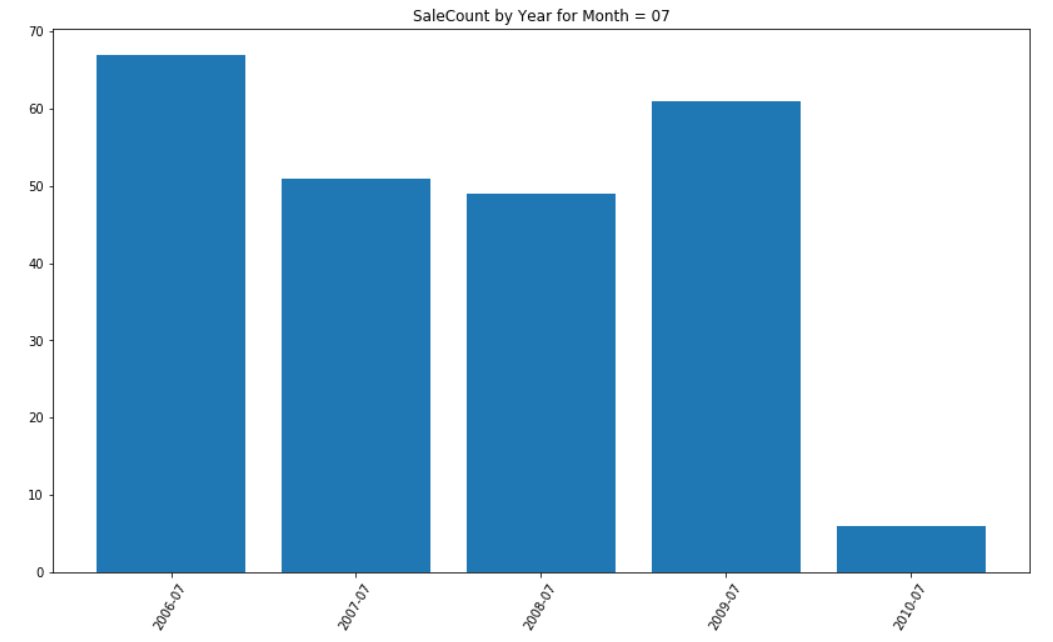

This graph has a constant trend except last data point. It means that we suddenly lost data, and the reason of that probably is the data was collected a long time ago. So, the second hypothesis is more reasonable.

In [20]:
home_data.isna().sum()
#home_data = home_data.dropna(axis=0)  Axiz 0 means row here 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [21]:
#Selecting Taget variable
# y = home_data.Price  # or home_data["Price"]

#### "scikit-learn" library while coding is written as "sklearn"  - Used to create models 
Steps to building and using a model are:

Define: What type of model will it be? A decision tree? Some other type of model? Some other parameters of the model type are specified too.
Fit: Capture patterns from provided data. This is the heart of modeling.
Predict: Just what it sounds like
Evaluate: Determine how accurate the model's predictions are.

###### An example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [22]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [23]:
y = home_data["SalePrice"]

Now you will create a DataFrame called X holding the predictive features.

Since you want only some columns from the original data, you'll first create a list with the names of the columns you want in X.

You'll use just the following columns in the list (you can copy and paste the whole list to save some typing, though you'll still need to add quotes):

LotArea
YearBuilt
1stFlrSF
2ndFlrSF
FullBath
BedroomAbvGr
TotRmsAbvGrd

In [24]:
# Create the list of features below
feature_names = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]

# Select data corresponding to features in feature_names
X = home_data[feature_names]

In [25]:
# Review data
# print description or statistics from X
print(X.describe())

# print the top few lines
print(X.head())

             LotArea    YearBuilt     1stFlrSF     2ndFlrSF     FullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082  1971.267808  1162.626712   346.992466     1.565068   
std      9981.264932    30.202904   386.587738   436.528436     0.550916   
min      1300.000000  1872.000000   334.000000     0.000000     0.000000   
25%      7553.500000  1954.000000   882.000000     0.000000     1.000000   
50%      9478.500000  1973.000000  1087.000000     0.000000     2.000000   
75%     11601.500000  2000.000000  1391.250000   728.000000     2.000000   
max    215245.000000  2010.000000  4692.000000  2065.000000     3.000000   

       BedroomAbvGr  TotRmsAbvGrd  
count   1460.000000   1460.000000  
mean       2.866438      6.517808  
std        0.815778      1.625393  
min        0.000000      2.000000  
25%        2.000000      5.000000  
50%        3.000000      6.000000  
75%        3.000000      7.000000  
max        8.000000     14.

In [29]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=2)  # Many machine learning models allow some randomness in model training. Specifying a number for random_state ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

# Fit the model
iowa_model.fit(X,y)

DecisionTreeRegressor(random_state=2)

In [30]:
predictions = iowa_model.predict(X)
print(predictions)

[208500. 181500. 223500. ... 266500. 142125. 147500.]


Use the head method to compare the top few predictions to the actual home values (in y) for those same homes. Anything surprising?

In [31]:
# You can write code in this cell
print("Original data : \n",home_data['SalePrice'].head(5) , "\n")
print("Predicted values are:  \n ", predictions[:5])

Original data : 
 0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64 

Predicted values are:  
  [208500. 181500. 223500. 140000. 250000.]


#### Decision Tree vs LR comparison : 

https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222#:~:text=LR%20vs%20Decision%20Tree%20%3A,be%20having%20better%20average%20accuracy.

#### Model Validation
There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE). Let's break down this metric starting with the last word, error.

If we build a model using training data and then compare the actual vs predicted data MAE values, then it is called as "in-sample" scores. 

Since this pattern was derived from the training data, the model will appear accurate in the training data.

But if this pattern doesn't hold when the model sees new data, the model would be very inaccurate when used in practice. Validation data could be used separately for testing of model validation


#### If the MAE error comes off as very large, we then look at ways on how to reduce the error - There are many ways to improve this model, such as experimenting to find better features or different model types.

In [32]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split

# fill in and uncomment
train_X, val_X, train_y, val_y = train_test_split(X,y, random_state=1)

In [33]:
# You imported DecisionTreeRegressor in your last exercise
# and that code has been copied to the setup code above. So, no need to
# import it again

# Specify the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit iowa_model with the training data.
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

In [34]:
val_predictions = iowa_model.predict(val_X)

In [35]:
# print the top few validation predictions
print(val_predictions[:10])
# print the top few actual prices from validation data
print(val_y.head(10))

[186500. 184000. 130000.  92000. 164500. 220000. 335000. 144152. 215000.
 262000.]
258     231500
267     179500
288     122000
649      84500
1233    142000
167     325624
926     285000
831     151000
1237    195000
426     275000
Name: SalePrice, dtype: int64


In [36]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

# uncomment following line to see the validation_mae
print(val_mae)

29652.931506849316


Is that MAE good? There isn't a general rule for what values are good that applies across applications. But you'll see how to use (and improve) this number in the next step.

#### In Decision Tree : 

A tree's depth is a measure of how many splits it makes before coming to a prediction.

You can see in scikit-learn's documentation that the decision tree model has many options (more than you'll want or need for a long time). The most important options determine the tree's depth

scikit-learn decision tree documentation : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

### Overfitting and Underfitting
When we divide the houses amongst many leaves, we also have fewer houses in each leaf. Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

This is a phenomenon called overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

At an extreme, if a tree divides houses into only 2 or 4, each group still has a wide variety of houses. Resulting predictions may be far off for most houses, even in the training data (and it will be bad in validation too for the same reason). When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called underfitting.

Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. Visually, we want the low point of the (red) validation curve in the figure below.

The max_leaf_nodes argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

We can use a utility function to help compare MAE scores from different values for max_leaf_nodes:

In [37]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [44]:
#Compare Different Tree Sizes
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
results= {}
#Write loop to find the ideal tree size from candidate_max_leaf_nodes
#for leaf_nodes in candidate_max_leaf_nodes:
#    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))
#    results= {leaf_nodes : get_mae(leaf_nodes, train_X, val_X, train_y, val_y)}
#Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
#best_tree_size = min(results, key=results.get)

#Alternatively
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}
print(scores)
best_tree_size = min(scores, key=scores.get)
print(best_tree_size)


{5: 35044.51299744237, 25: 29016.41319191076, 50: 27405.930473214907, 100: 27282.50803885739, 250: 27893.822225701646, 500: 29454.18598068598}
100


In [45]:
#Fit model using data 

In [46]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size ,random_state=1)

# fit the final model and uncomment the next two lines
final_model.fit(X, y)


DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)

In [47]:
final_model.predict(X)

array([209133.65384615, 146415.0075188 , 209133.65384615, ...,
       238763.63636364, 130629.        , 146415.0075188 ])

#### Progressing towards Random Forest

Decision trees leave you with a difficult decision. A deep tree with lots of leaves will overfit because each prediction is coming from historical data from only the few houses at its leaf. But a shallow tree with few leaves will perform poorly because it fails to capture as many distinctions in the raw data.

##### The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters.

There is likely room for further improvement, but this is a big improvement over the best decision tree error of 250,000. There are parameters which allow you to change the performance of the Random Forest much as we changed the maximum depth of the single decision tree. But one of the best features of Random Forest models is that they generally work reasonably even without this tuning.

In [48]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state=1)

# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_model_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_model_predictions, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))


Validation MAE for Random Forest Model: 21857.15912981083
